# Задание 1 

In [2]:
import pandas as pd

# Данные по числу автомобилей на улице и в гараже за 5 рабочих дней
data = {
    'День': ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница'],
    'Улица': [80, 98, 75, 91, 78],
    'Гараж': [100, 82, 105, 89, 102]
}

# Создадим DataFrame
df = pd.DataFrame(data)

# Выводим данные
print(df)

          День  Улица  Гараж
0  Понедельник     80    100
1      Вторник     98     82
2        Среда     75    105
3      Четверг     91     89
4      Пятница     78    102


### Задание 1.1

In [3]:
# Корреляция Пирсона между «Улица» и «Гараж»
correlation = df['Улица'].corr(df['Гараж'], method='pearson')
print(f"Корреляция между числом автомобилей на улице и в гараже: {correlation:.4f}")

Корреляция между числом автомобилей на улице и в гараже: -1.0000


### Задание 1.2

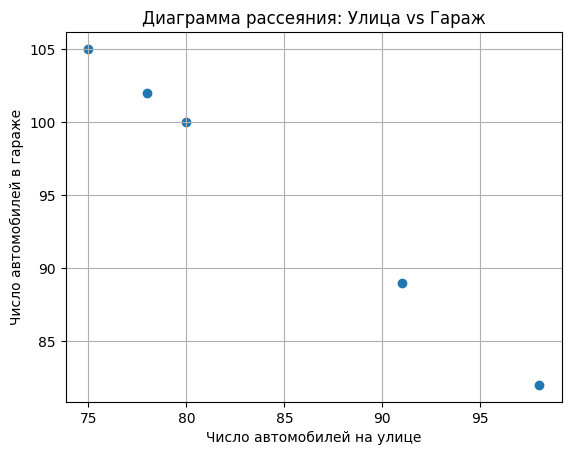

In [4]:
# Построение диаграммы рассеяния
import matplotlib.pyplot as plt

plt.scatter(df['Улица'], df['Гараж'])
plt.title("Диаграмма рассеяния: Улица vs Гараж")
plt.xlabel("Число автомобилей на улице")
plt.ylabel("Число автомобилей в гараже")
plt.grid(True)
plt.show()


# Задание 2

In [5]:
# Загрузка данных
df_insurance = pd.read_csv('insurance.csv')

# Посмотрим на первые строки
print(df_insurance.head())

# Посмотрим общую информацию о данных
print(df_insurance.info())

# Выведем описание числовых признаков
print(df_insurance.describe())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 

### Задание 2.1

In [7]:
df_insurance_encoded = pd.get_dummies(df_insurance, drop_first=True)

# Теперь построим корреляционную матрицу для числовых признаков
correlation_matrix = df_insurance_encoded.corr()

# Выведем корреляционную матрицу
print(correlation_matrix)

# Найдём переменную, которая наиболее коррелирует с целевой переменной (charges)
target_variable = 'charges'
correlations_with_target = correlation_matrix[target_variable].drop(target_variable)

# Наиболее коррелирующая переменная
most_correlated_feature = correlations_with_target.idxmax()
max_correlation_value = correlations_with_target.max()

print(f"Наиболее коррелирующая переменная с '{target_variable}' — {most_correlated_feature} ({max_correlation_value:.4f})")

                       age       bmi  children   charges  sex_male  \
age               1.000000  0.109272  0.042469  0.299008 -0.020856   
bmi               0.109272  1.000000  0.012759  0.198341  0.046371   
children          0.042469  0.012759  1.000000  0.067998  0.017163   
charges           0.299008  0.198341  0.067998  1.000000  0.057292   
sex_male         -0.020856  0.046371  0.017163  0.057292  1.000000   
smoker_yes       -0.025019  0.003750  0.007673  0.787251  0.076185   
region_northwest -0.000407 -0.135996  0.024806 -0.039905 -0.011156   
region_southeast -0.011642  0.270025 -0.023066  0.073982  0.017117   
region_southwest  0.010016 -0.006205  0.021914 -0.043210 -0.004184   

                  smoker_yes  region_northwest  region_southeast  \
age                -0.025019         -0.000407         -0.011642   
bmi                 0.003750         -0.135996          0.270025   
children            0.007673          0.024806         -0.023066   
charges             0.78725

### Задание 2.2

In [9]:
import numpy as np

from sklearn.metrics import mean_squared_error

# Переменные для регрессии
X = df_insurance_encoded[most_correlated_feature].values
y = df_insurance_encoded[target_variable].values

# Реализация простой линейной регрессии
n = len(X)
X_mean = np.mean(X)
y_mean = np.mean(y)

# Вычисляем коэффициенты наклона и сдвига
numerator = np.sum((X - X_mean) * (y - y_mean))
denominator = np.sum((X - X_mean) ** 2)
slope = numerator / denominator
intercept = y_mean - slope * X_mean

# Вычисляем предсказания модели
y_pred = slope * X + intercept

# Среднеквадратичная ошибка (MSE)
mse = mean_squared_error(y, y_pred)

print(f"Наклон: {slope:.4f}")
print(f"Сдвиг (intercept): {intercept:.4f}")
print(f"Среднеквадратичная ошибка (MSE): {mse:.4f}")


Наклон: 23615.9635
Сдвиг (intercept): 8434.2683
Среднеквадратичная ошибка (MSE): 55720715.9542


### Задание 2.3

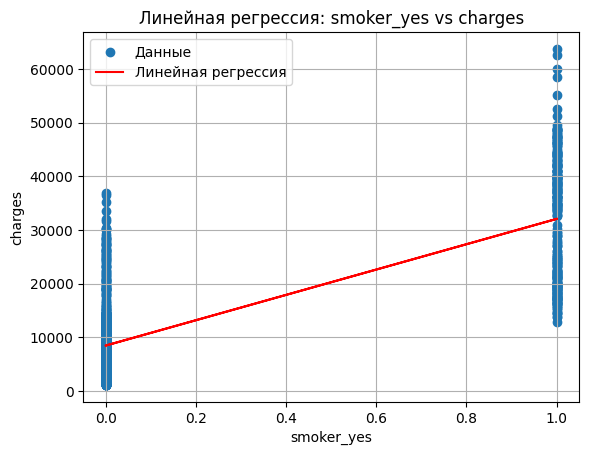

In [10]:
# Визуализация регрессии
plt.scatter(X, y, label='Данные')
plt.plot(X, y_pred, color='red', label='Линейная регрессия')
plt.title(f"Линейная регрессия: {most_correlated_feature} vs {target_variable}")
plt.xlabel(most_correlated_feature)
plt.ylabel(target_variable)
plt.legend()
plt.grid(True)
plt.show()
